# LIBRARIES

In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

# DATA PREPERATION

In [2]:
df = yf.download(tickers='ETH-USD', start="2020-07-01", end="2021-07-01")

[*********************100%***********************]  1 of 1 completed


## First Glance

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,227.968430,229.476807,224.815186,226.315002,226.315002,6094093001
2020-07-01,226.134583,232.756119,224.835739,231.113419,231.113419,6463737443
2020-07-02,231.288910,232.396881,225.461960,229.392197,229.392197,6212210566
2020-07-03,229.318954,229.629318,224.913971,225.387070,225.387070,5109032700
2020-07-04,225.288483,230.054138,225.133316,229.074112,229.074112,5228310135


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,363.0,1.237633e+03,9.662340e+02,2.252885e+02,3.888411e+02,7.314728e+02,1.918915e+03,4.174636e+03
High,363.0,1.291933e+03,1.015391e+03,2.294768e+02,3.989274e+02,7.542994e+02,1.977109e+03,4.362351e+03
Low,363.0,1.176570e+03,9.071960e+02,2.245445e+02,3.803643e+02,7.197922e+02,1.819650e+03,3.785849e+03
Close,363.0,1.243099e+03,9.662841e+02,2.253871e+02,3.890728e+02,7.378034e+02,1.922110e+03,4.168701e+03
Adj Close,363.0,1.243099e+03,9.662841e+02,2.253871e+02,3.890728e+02,7.378034e+02,1.922110e+03,4.168701e+03
Volume,363.0,2.396258e+10,1.399868e+10,5.109033e+09,1.278348e+10,2.106715e+10,3.183429e+10,8.448291e+10


In [5]:
df.isnull().values.any()

False

## Visualization

<AxesSubplot:title={'center':'ETHUSD values in between 2012-07-01 and 2021-07-01'}, xlabel='Date'>

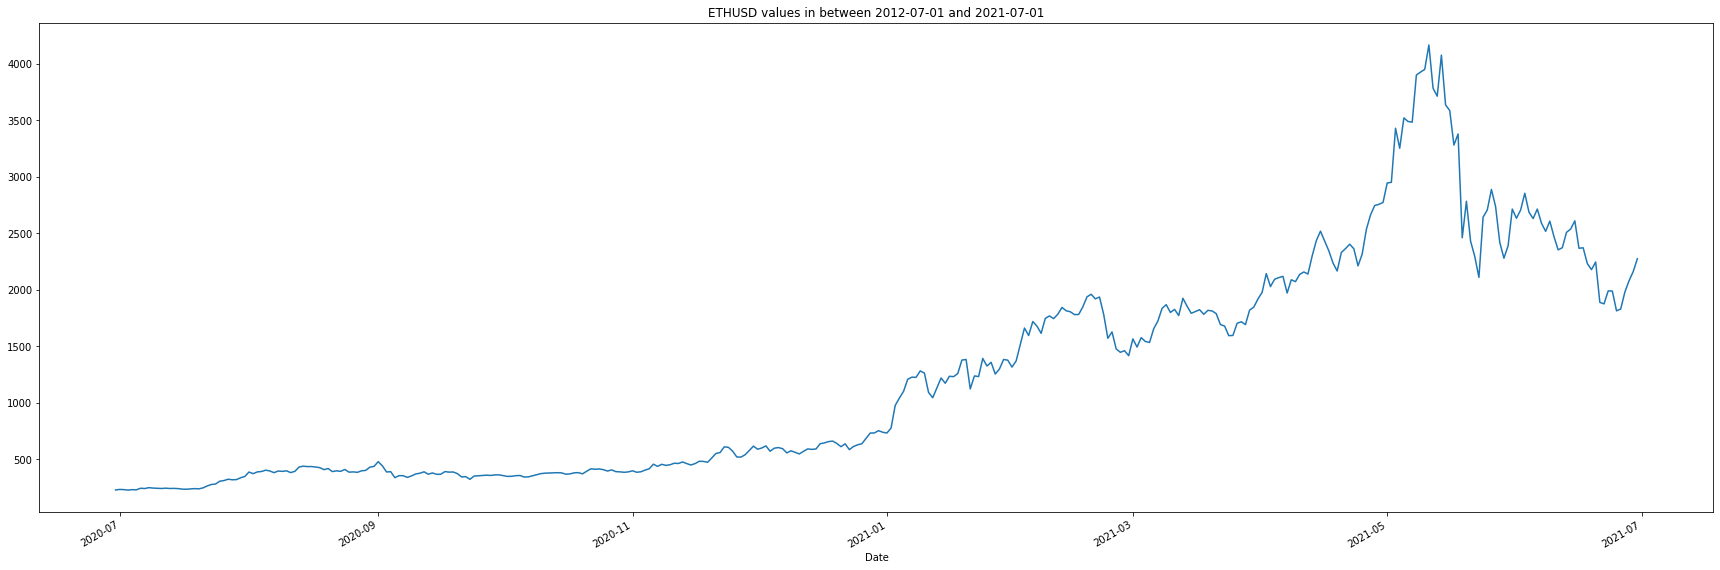

In [6]:
df["Close"].plot(title = "ETHUSD values in between 2012-07-01 and 2021-07-01")

## Final Data

In [7]:
final_df = pd.DataFrame()
final_df["Close"] = df["Close"]
final_df["Change"] = df["Close"].pct_change()

mu = final_df['Change'][1:].mean() 
sigma = final_df['Change'][1:].std()

In [8]:
final_df.head()

,Close,Change
Date,,
2020-06-30,226.315002,NaN
2020-07-01,231.113419,0.021202
2020-07-02,229.392197,-0.007448
2020-07-03,225.387070,-0.017460
2020-07-04,229.074112,0.016359


# Random Walk

In [9]:
close_vals = []
close_vals = df["Close"].values

In [10]:
N_days = int(len(df) * 0.2)
N_pred = 10

In [11]:
col_names = []
for curr in range(N_pred):
    col_names.append("Prediction" + str(curr))
pred_df = pd.DataFrame(columns = col_names)

pred_df.head()

,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9


In [12]:
for curr in range(N_pred):
    pred_df["Prediction" + str(curr)] = close_vals[:N_days]

In [13]:
for curr_pred in range(N_pred):
    for curr_index in range(N_pred, len(df)):
        old_price = close_vals[curr_index]
        new_price = old_price * (1+ mu) + old_price * sigma * np.random.normal(0,1)
        pred_df["Prediction" + str(curr_pred)][curr_index] = new_price

In [14]:
pred_df["Close"] =  final_df["Close"]

<AxesSubplot:>

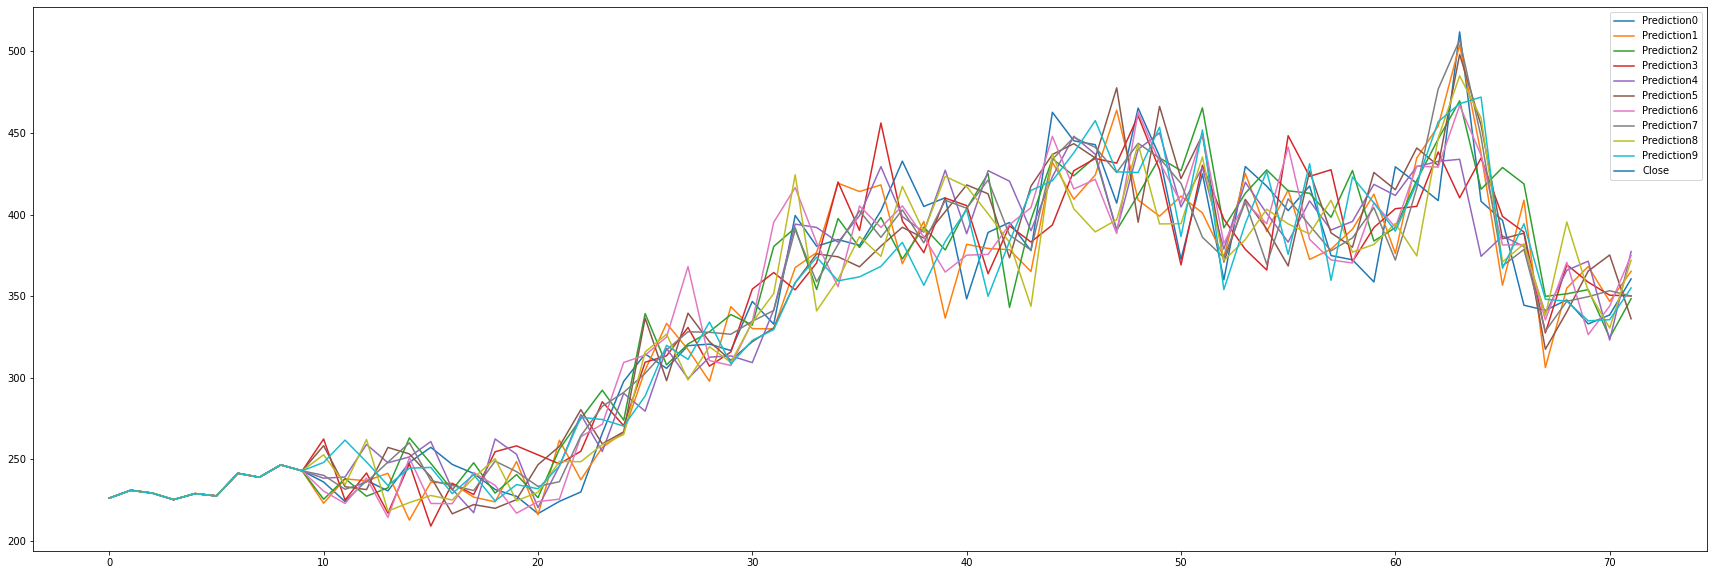

In [15]:
pred_df.plot()